#  hiclass - k-evolution comparison

## Loading libraries

In [1]:
import numpy as np
import matplotlib

import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
import scipy.integrate as integrate
import h5py
from mayavi import mlab

# from readgadget import *
# from pygadgetreader import *
ColorsI = ["red","blue","green","purple","darkcyan","gold","maroon","black","darkslategrey",
           "darkgreen","navy","indigo","magenta","salmon","dodgerblue","springgreen","plum",
           "cyan","khaki","lightcoral","gray"]
ColorsII = []

NUM_COLORS = 20
from matplotlib.colors import LogNorm

cm = plt.get_cmap('gist_rainbow')
# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'
from matplotlib import colors, ticker, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
plt.rcParams['font.serif'] = 'Ubuntu'
from matplotlib import colors, ticker, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict

from scipy.interpolate import interp1d

text_size=26
fig_size_x=24
fig_size_y=14

def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
    

# Loading BG files

In [2]:
direct = "./../output/"
bg = np.loadtxt(direct+"/file__background.dat")
# class_bg_test = np.loadtxt("./../../hi_class_pub_devel_test//output/kessence_power00_background.dat")
class_bg = np.loadtxt("./../../hi_class_pub_devel//output/kessence_power00_background.dat")


## Hubble comparison

In [3]:
# As=2.215*1.e-9;
# h=0.67556;
# kp=0.05/h; 
# ns=0.9619;
# cs2_e3=1.e-7;
# c=2.99792458*1.e5; #Km/s
# Boxsize=300.;
# # c_gev=2997.92458; #[100km/s]
# H0_conf_Gev=0.11117550483538947#np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
# # we obtain 0.11 from gevolution!

# # H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# # print("H0[1/Mpc]=100h/c: ",H0);
# w=-0.9;
# # print("H0[1/Mpc]=100h/c: ",H0);
# def Hubble_conf_Mpc(a):
#     c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
#     Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
#     Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
#     Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
#     return H0_conf_Gev*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))
# Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
# Omega_m=Omega_b + Omega_cdm;

# Loading files

In [5]:
direct1 = "./../all_data/euler_dtau_0d04_N_kess_10///"
direct2 = "./../all_data/euler_dtau_0d04_N_kess_20///"
direct3 = "./../all_data/leap_frog_0d04_N_kess_10///"
direct4 = "./../all_data/leap_frog_0d04_N_kess_20///"
direct5 = "./../output//"


snap_info = np.loadtxt(direct+"/snapshots.txt")

# avg_file1 = np.loadtxt(direct1+"/Result_avg.txt")
# avg_file2 = np.loadtxt(direct2+"/Result_avg.txt")
# avg_file3 = np.loadtxt(direct3+"/Result_avg.txt")
# avg_file4 = np.loadtxt(direct4+"/Result_avg.txt")

avg_file_out = np.loadtxt(direct5+"/Result_avg.txt")

class_file = np.loadtxt("./../../hi_class_pub_devel/output/kessence_power00_background.dat")

# class_file_test = np.loadtxt("./../../hi_class_pub_devel_test//output/kessence_power01_background.dat")


/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: loadtxt: Empty input file: "./../output//snapshots.txt"
  


# $\varphi$, $\varphi'$

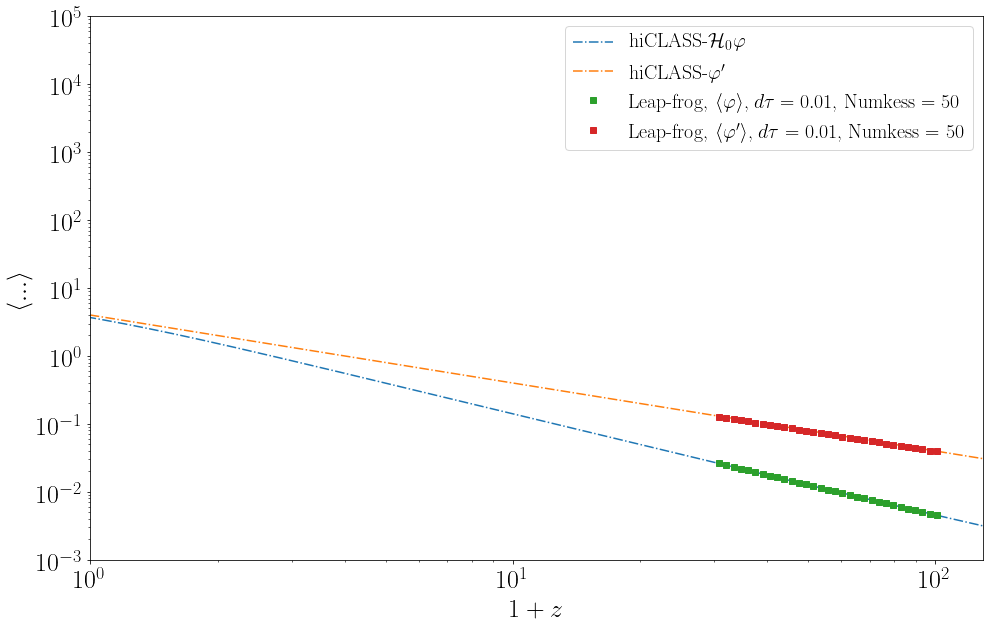

In [8]:
#####################
phi_smg = interp1d(class_file[:,0], class_file[:,28])
phi_prime = interp1d(class_file[:,0], class_file[:,29])

H_class = interp1d(class_file[:,0], class_file[:,3])
cs2 = interp1d(class_file[:,0], class_file[:,26])
p = interp1d(class_file[:,0], class_file[:,19])
rho = interp1d(class_file[:,0], class_file[:,18])

rho_cdm = interp1d(class_file[:,0], class_file[:,10])
rho_b = interp1d(class_file[:,0], class_file[:,9])

rho_crt = interp1d(class_file[:,0], class_file[:,12])
alpha_k = interp1d(class_file[:,0], class_file[:,22])

phi_gev = interp1d(avg_file_out[:,0],avg_file_out[:,1])
phi_prime_gev = interp1d(avg_file_out[:,0],avg_file_out[:,2])

redshift = interp1d(class_file[:,0], class_file[:,2])

#####################
plt.figure(figsize=(16,10))
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
plt.rc('font', **font)


# plt.plot(1+class_file[:,0],class_file[:,26],"o",label=r"CLASS-$c_s^2$")
a = 1./(1+class_file[:,0])
X = class_file[:,29]**2/(2.0 * a**2)
P =  p(class_file[:,0]);
dKdX = (rho(class_file[:,0]) + p(class_file[:,0]))/(2.0 * X)

cs2_hiclass = cs2(class_file[:,0]);
phi_hiclass = phi_smg (class_file[:,0])
phi_p_hiclass = phi_prime (class_file[:,0])

H0 = H_class(0.0);
plt.plot(1+class_file[:,0],phi_hiclass*H0,"-.",label=r"hiCLASS-$ \mathcal H_0\varphi$")
plt.plot(1+class_file[:,0],phi_p_hiclass,"-.",label=r"hiCLASS-$\varphi'$")


# plt.plot(1+avg_file1[:,0],np.abs(avg_file1[:,1]),".",label=r"Euler, $\langle \varphi \rangle$, $d\tau = 0.04$, Numkess = 10")
# plt.plot(1+avg_file1[:,0],np.abs(avg_file1[:,2]),".",label=r"Euler, $\langle \varphi' \rangle$, $d\tau = 0.04$, Numkess = 10")

# plt.plot(1+avg_file2[:,0],np.abs(avg_file2[:,5]),"o",label=r"Euler, $\langle c_s^2 \rangle$, $d\tau = 0.04$, Numkess = 20")
# plt.plot(1+avg_file3[:,0],np.abs(avg_file3[:,5]),"o",label=r"Leap-frog, $\langle c_s^2 \rangle$, $d\tau = 0.04$, Numkess = 10")
# plt.plot(1+avg_file4[:,0],np.abs(avg_file4[:,5]),"o",label=r"Leap-frog, $\langle c_s^2 \rangle$, $d\tau = 0.04$, Numkess = 20")
plt.plot(1+avg_file_out[:,0],np.abs(avg_file_out[:,1]),"s",label=r"Leap-frog, $\langle \varphi \rangle$, $d\tau = 0.01$, Numkess = 50")
plt.plot(1+avg_file_out[:,0],np.abs(avg_file_out[:,2]),"s",label=r"Leap-frog, $\langle \varphi' \rangle$, $d\tau = 0.01$, Numkess = 50")



plt.ylabel(r"$\langle ...\rangle$")
plt.xlabel(r"$1+z$")
plt.xlim(1, 130 )
plt.ylim(1.e-3, 1.e5)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=20)



#  $c_s^2$

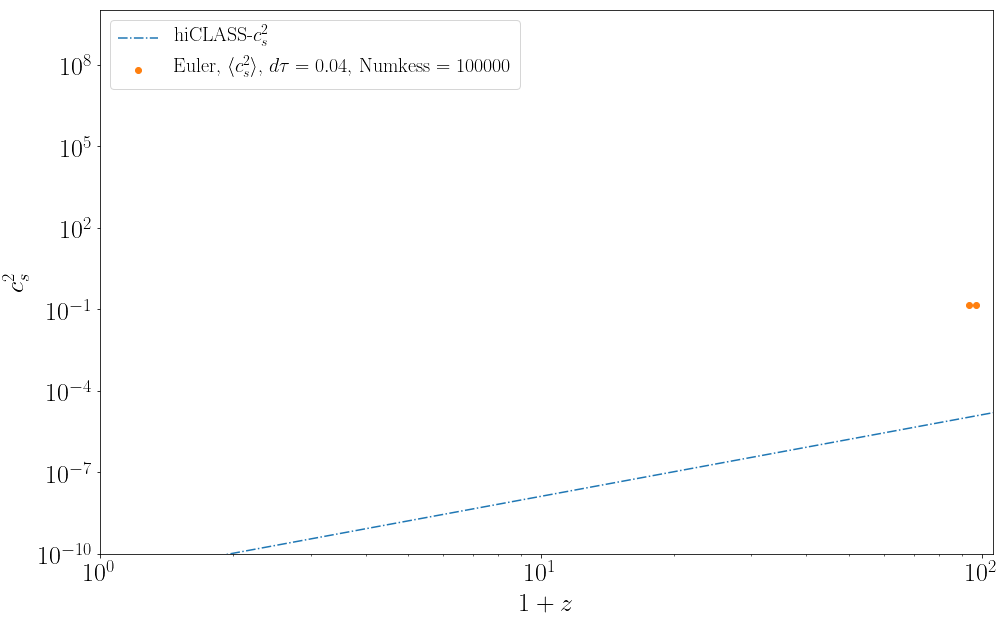

In [40]:
#####################
phi_smg = interp1d(class_file[:,0], class_file[:,28])
phi_prime = interp1d(class_file[:,0], class_file[:,29])

H_class = interp1d(class_file[:,0], class_file[:,3])
cs2 = interp1d(class_file[:,0], class_file[:,26])
p = interp1d(class_file[:,0], class_file[:,19])
rho = interp1d(class_file[:,0], class_file[:,18])

rho_cdm = interp1d(class_file[:,0], class_file[:,10])
rho_b = interp1d(class_file[:,0], class_file[:,9])

rho_crt = interp1d(class_file[:,0], class_file[:,12])
alpha_k = interp1d(class_file[:,0], class_file[:,22])

phi_gev = interp1d(avg_file1[:,0],avg_file1[:,1])
phi_prime_gev = interp1d(avg_file1[:,0],avg_file1[:,2])

redshift = interp1d(class_file[:,0], class_file[:,2])

#####################
plt.figure(figsize=(16,10))
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
plt.rc('font', **font)


# plt.plot(1+class_file[:,0],class_file[:,26],"o",label=r"CLASS-$c_s^2$")
a = 1./(1+class_file[:,0])
X = class_file[:,29]**2/(2.0 * a**2)
P =  p(class_file[:,0]);
dKdX = (rho(class_file[:,0]) + p(class_file[:,0]))/(2.0 * X)
cs2_hiclass = cs2(class_file[:,0]);
plt.plot(1+class_file[:,0],cs2_hiclass,"-.",label=r"hiCLASS-$c_s^2$")


# plt.plot(1+class_file_test[:,0],class_file_test[:,24],"-.",label=r"hiCLASS-test-$X$")

# plt.plot(1+class_file[:,0],np.abs(P),"o",label=r"hiCLASS-$X - ours$")


# plt.plot(1+avg_file1[:,0],np.abs(avg_file1[:,5]),"o",label=r"Euler, $\langle c_s^2 \rangle$, $d\tau = 0.04$, Numkess = 10")
# plt.plot(1+avg_file2[:,0],np.abs(avg_file2[:,5]),"o",label=r"Euler, $\langle c_s^2 \rangle$, $d\tau = 0.04$, Numkess = 20")
# plt.plot(1+avg_file3[:,0],np.abs(avg_file3[:,5]),"o",label=r"Leap-frog, $\langle c_s^2 \rangle$, $d\tau = 0.04$, Numkess = 10")
# plt.plot(1+avg_file4[:,0],np.abs(avg_file4[:,5]),"o",label=r"Leap-frog, $\langle c_s^2 \rangle$, $d\tau = 0.04$, Numkess = 20")
plt.plot(1+avg_file_out[:,0],np.abs(avg_file_out[:,5]),"o",label=r"Euler, $\langle c_s^2 \rangle$, $d\tau = 0.04$, Numkess = 100000")



plt.ylabel(r"$c_s^2$")
plt.xlabel(r"$1+z$")
plt.xlim(1, 106 )
plt.ylim(1.e-10, 1.e10)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=20)



In [57]:
# #####################
# phi_smg = interp1d(class_file[:,0], class_file[:,28])
# phi_prime = interp1d(class_file[:,0], class_file[:,29])

# H_class = interp1d(class_file[:,0], class_file[:,3])
# cs2 = interp1d(class_file[:,0], class_file[:,26])
# p = interp1d(class_file[:,0], class_file[:,19])
# rho = interp1d(class_file[:,0], class_file[:,18])

# rho_cdm = interp1d(class_file[:,0], class_file[:,10])
# rho_b = interp1d(class_file[:,0], class_file[:,9])

# rho_crt = interp1d(class_file[:,0], class_file[:,12])
# alpha_k = interp1d(class_file[:,0], class_file[:,22])

# phi_gev = interp1d(avg_file[:,0],avg_file[:,1])
# phi_prime_gev = interp1d(avg_file[:,0],avg_file[:,2])

# redshift = interp1d(class_file[:,0], class_file[:,2])

# #####################
# plt.figure(figsize=(16,10))
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}
# plt.rc('font', **font)


# # plt.plot(1+class_file[:,0],class_file[:,26],"o",label=r"CLASS-$c_s^2$")
# a = 1./(1+class_file[:,0])
# X = class_file[:,29]**2/(2.0 * a**2)
# P =  p(class_file[:,0]);
# dKdX = (rho(class_file[:,0]) + p(class_file[:,0]))/(2.0 * X)

# plt.plot(1+class_file[:,0],X-8.0,"-.",label=r"hiCLASS-,$X$-$\hat{X}$")


# # plt.plot(1+class_file_test[:,0],class_file_test[:,24],"-.",label=r"hiCLASS-test-$X$")

# # plt.plot(1+class_file[:,0],np.abs(P),"o",label=r"hiCLASS-$X - ours$")


# plt.plot(1+avg_file[:,0],avg_file[:,5]-8.0,"o",label=r"$\bar{X}-\hat{X}$")


# plt.ylabel(r"$X - \hat{X}$")
# plt.xlabel(r"$1+z$")
# plt.xlim(1, 106 )
# # plt.ylim(7.8, 8.3)
# plt.yscale('log')
# plt.xscale('log')
# plt.legend(fontsize=20)



In [104]:
# plt.figure(figsize=(16,10))
# plt.rc('text', usetex=True)
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : text_size}
# plt.rc('font', **font)


# plt.plot(1+class_file[:,0],class_file[:,26],"o",label=r"CLASS-$c_s^2$")
# plt.plot(1+avg_file[:,0],avg_file[:,5],"o",label=r"$\bar{c_s^2}$")


# plt.ylabel(r"$c_s^2$")
# plt.xlabel(r"$1+z$")
# plt.xlim(1, 104 )
# # plt.ylim(-1.e-2, 0.05)
# plt.yscale('log')
# plt.xscale('log')
# plt.legend(fontsize=20)



## Some tests

In [52]:
phi_smg = interp1d(class_file[:,0], class_file[:,28])
phi_prime = interp1d(class_file[:,0], class_file[:,29])

H_class = interp1d(class_file[:,0], class_file[:,3])
cs2 = interp1d(class_file[:,0], class_file[:,26])
p = interp1d(class_file[:,0], class_file[:,19])
rho = interp1d(class_file[:,0], class_file[:,18])

rho_cdm = interp1d(class_file[:,0], class_file[:,10])
rho_b = interp1d(class_file[:,0], class_file[:,9])

rho_crt = interp1d(class_file[:,0], class_file[:,12])
alpha_k = interp1d(class_file[:,0], class_file[:,22])

# phi_gev = interp1d(avg_file[:,0],avg_file[:,1])
# phi_prime_gev = interp1d(avg_file[:,0],avg_file[:,2])

redshift = interp1d(class_file[:,0], class_file[:,2])

# a(100)
# cs2(100)
# Boxsize = 500;
# c=2.99792458*1.e5; #Km/s
# H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1

# Initial values for phi_smg and phi_smg'

In [57]:
# print("hiclass, z=100: ",phi_smg(100.0)* H0,phi_prime(100.0))
# print("hiclass, z=90: ",phi_smg(90.0)* H0,phi_prime(90.0))
# print("hiclass, z=10: ",phi_smg(10.0)* H0,phi_prime(10.0))
# print("hiclass, z=0: ",phi_smg(0.0)* H0,phi_prime(0.0))


# print(" gev: z=100",phi_gev(100),phi_prime_gev(100))
# print("gev: z=90",phi_gev(90.),phi_prime_gev(90.))
# print("gev: z=10",phi_gev(10.),phi_prime_gev(10.))
# print("gev: z=0",phi_gev(0),phi_prime_gev(0))


# Power spectra

In [64]:
data = nested_dict(5, list)
redshift = [100, 50, 30]

direct = "./../output/"
direc_hi = "./../../hi_class_pub_devel/output/"
for i in range(np.shape(redshift)[0]):
    
    data["pk"]["m"]["z="+str(redshift[i])] = np.loadtxt(direct+"/file_pk_"+str(i).zfill(3)+"_delta.dat")
    data["pk"]["pi_k"]["z="+str(redshift[i])] = np.loadtxt(direct+"/file_pk_"+str(i).zfill(3)+"_pi_k.dat")
    data["pk"]["zeta"]["z="+str(redshift[i])] = np.loadtxt(direct+"/file_pk_"+str(i).zfill(3)+"_zeta.dat")
    
    data["class"]["tk"]["z="+str(redshift[i])] = np.loadtxt(direc_hi+"/kessence_power00_z"+str(i+1)+"_tk.dat")
    data["class"]["pm"]["z="+str(redshift[i])] = np.loadtxt(direc_hi+"/kessence_power00_z"+str(i+1)+"_pk.dat")

# CLASS conversion :
k_pivot = 0.05
A_s = 2.1e-9
n_s = 0.96
h = 0.67
k_class = data["class"]["tk"]["z="+str(redshift[0])][:,0]


## $\varphi$ power

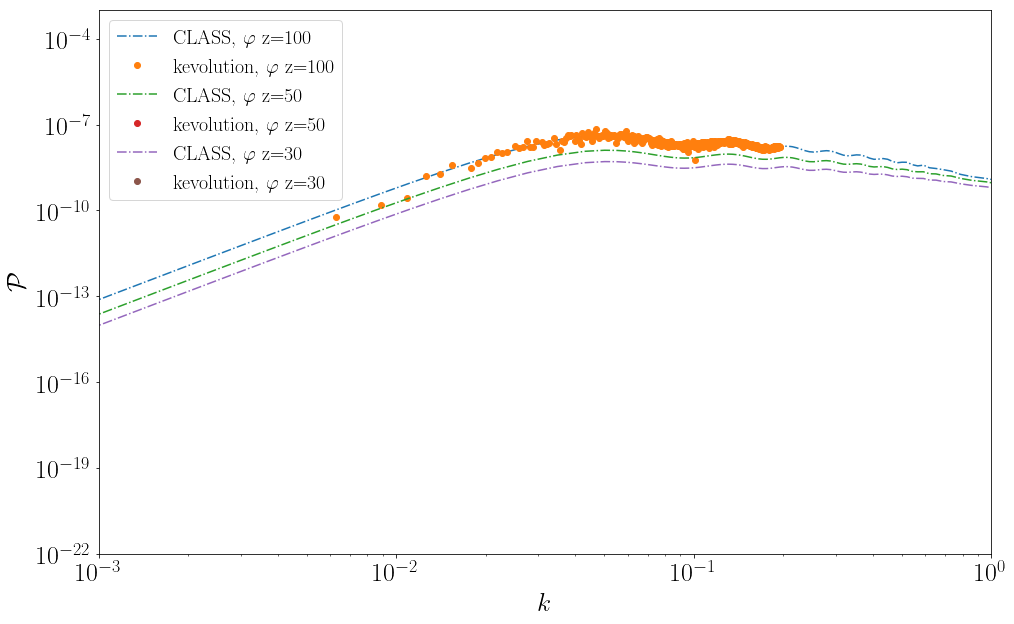

In [59]:
plt.figure(figsize=(16,10))
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
plt.rc('font', **font)

# phi_bar is the output of hiclass background. 
# delta_phi = v_x_smg * (phi_bar_prime/a)
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s
Boxsize=320.;
c_gev=2997.92458; #[100km/s]
H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
Normlization=As*(data['class']['tk']["z="+str(100)][:,0]/k_pivot)**(ns-1.);

for i in redshift:
    k_class = data["class"]["tk"]["z="+str(i)][:,0]
    tk = data["class"]["tk"]["z="+str(i)][:,5] #* H_class(i)* 1./(1 + i) # vx_smg 
    pk_hiclass = tk**2 * Normlization # What is computed in kev is Hconf * pi
    plt.plot(k_class,pk_hiclass ,"-.",label=r"CLASS, $\varphi$"+" z="+str(i))
    
    kgev = data["pk"]["pi_k"]["z="+str(i)][:,0]
    pkgev = data["pk"]["pi_k"]["z="+str(i)][:,1]
    plt.plot(kgev,pkgev ,"o",label=r"kevolution, $\varphi$"+" z="+str(i))


plt.ylabel(r"$\mathcal{P}$")
plt.xlabel(r"$k$")
plt.xlim(0.001, 1 )
plt.ylim(1.e-22, 1.e-3)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=20)



## $\varphi'$ power

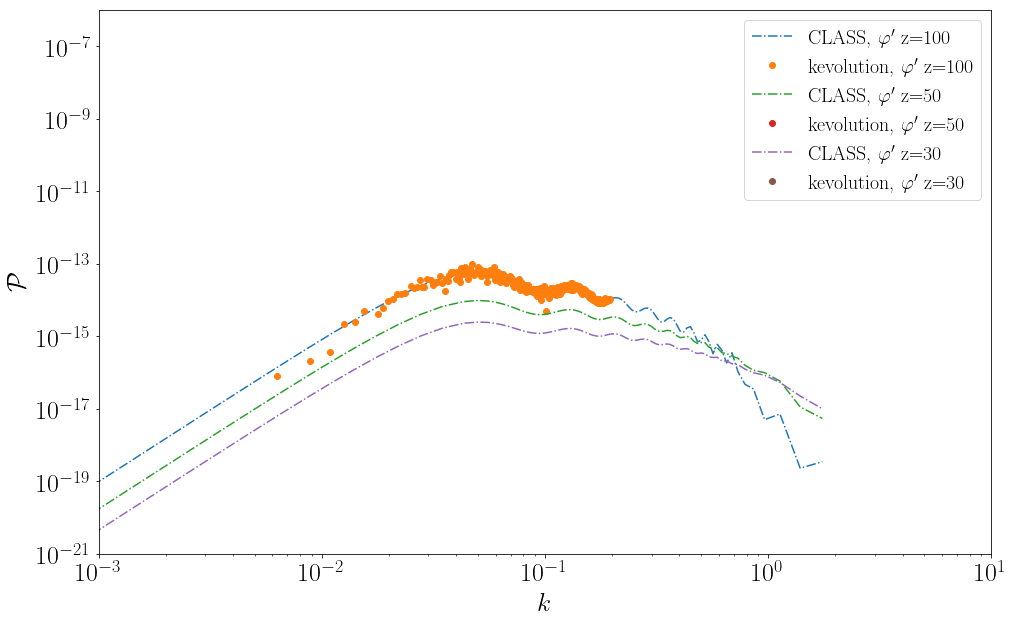

In [67]:
plt.figure(figsize=(16,10))
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
plt.rc('font', **font)


As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s
Boxsize=320.;
c_gev=2997.92458; #[100km/s]
H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
# phi_bar is the output of hiclass background. 
# delta_phi = v_x_smg * (phi_bar_prime/a)
Normlization=As*(data['class']['tk']["z="+str(100)][:,0]/k_pivot)**(ns-1.);

for i in redshift:
    k_class = data["class"]["tk"]["z="+str(i)][:,0]
    tk = data["class"]["tk"]["z="+str(i)][:,6] # vx_smg 
    pk_hiclass = tk**2 * Normlization  # What is computed in kev is Hconf * pi
    plt.plot(k_class,pk_hiclass ,"-.",label=r"CLASS, $\varphi'$"+" z="+str(i))
    
    kgev = data["pk"]["zeta"]["z="+str(i)][:,0]
    pkgev = data["pk"]["zeta"]["z="+str(i)][:,1]
    plt.plot(kgev,pkgev ,"o",label=r"kevolution, $\varphi'$"+" z="+str(i))


plt.ylabel(r"$\mathcal{P}$")
plt.xlabel(r"$k$")
plt.xlim(0.001, 10 )
plt.ylim(1.e-21, 1.e-6)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=20)



## Matter power

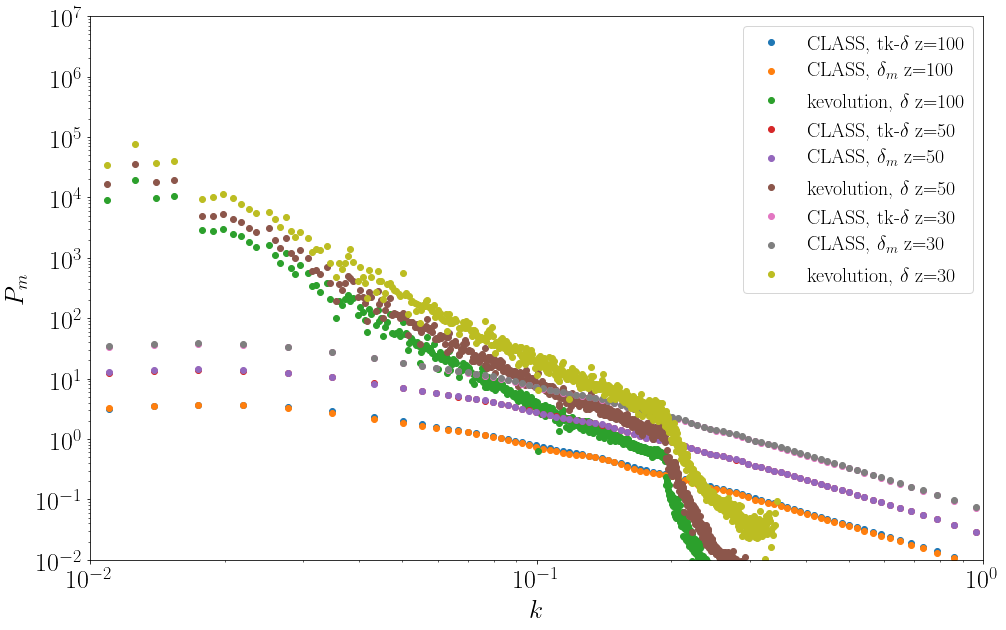

In [66]:
plt.figure(figsize=(16,10))
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}
plt.rc('font', **font)

# phi_bar is the output of hiclass background. 
# delta_phi = v_x_smg * (phi_bar_prime/a)

for i in redshift:
    k_class = data["class"]["tk"]["z="+str(i)][:,0]
    conversion = A_s*(k_class*h/k_pivot)**(n_s-1)*(2.*np.pi**2/(k_class**3));
    tk_cdm = data["class"]["tk"]["z="+str(i)][:,3] # cdm
    tk_b = data["class"]["tk"]["z="+str(i)][:,3] # b
    rho_m = rho_cdm(i)+rho_b(i)
    tk = (rho_cdm(i)/rho_m) * tk_cdm + (rho_b(i)/rho_m) * tk_b 
    pk_hiclass = tk**2 * conversion 
    plt.plot(k_class, pk_hiclass ,"o",label=r"CLASS, tk-$\delta$"+" z="+str(i))
    #########################
    pkm_hiclass = data["class"]["pm"]["z="+str(i)][:,1]
    k_class = data["class"]["pm"]["z="+str(i)][:,0]
    plt.plot(k_class, pkm_hiclass ,"o",label=r"CLASS, $\delta_m$"+" z="+str(i))

    #########################
    kgev = data["pk"]["m"]["z="+str(i)][:,0]
    pkgev = data["pk"]["m"]["z="+str(i)][:,1]
    plt.plot(kgev,pkgev*(2.0 * np.pi**2)/kgev**3 ,"o",label=r"kevolution, $\delta$"+" z="+str(i))


plt.ylabel(r"${P}_m$")
plt.xlabel(r"$k$")
plt.xlim(0.01, 1 )
plt.ylim(1.e-2, 1.e7)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=20)

